# Supplementary Figure
Kai Sandbrink


2024-06-01

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from utils import format_axis

analysis_folder = os.path.join('panels', 'fig_supps')
os.makedirs(analysis_folder, exist_ok=True)

square=True
axes_off=True

from settings_anal import TEXTWIDTH

In [ ]:
human_data_file_base = ''

## SFig 1: Efficacy Estimates

In [2]:
from human_utils_project import get_clean_data

day = 'day2'
exp_date = '24-01-22-29'
day1_test_mask_cutoff = {
    "groupA": {"lower": 10, "upper": 90},
    "groupB": {"lower": 8, "upper": 72}
}

group = None

df, effs_train, effs_test, test_start = get_clean_data(day = int(day[-1]), exp_date = exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)

n_steps = 50

In [3]:
df.columns

Index(['transitions_ep', 'transitions_ep_rightwrong', 'rewards_tallies', 'ps',
       'effs', 'n_observes', 'intended_correct', 'survey_responses',
       'efficacy_estimates', 'group'],
      dtype='object')

In [4]:
from human_utils_project import sort_train_test

df_estimates = df[df['efficacy_estimates'].notnull()].copy()

n_train, n_test = sort_train_test(df_estimates['efficacy_estimates'], df_estimates['effs'], test_start, group=df['group'])



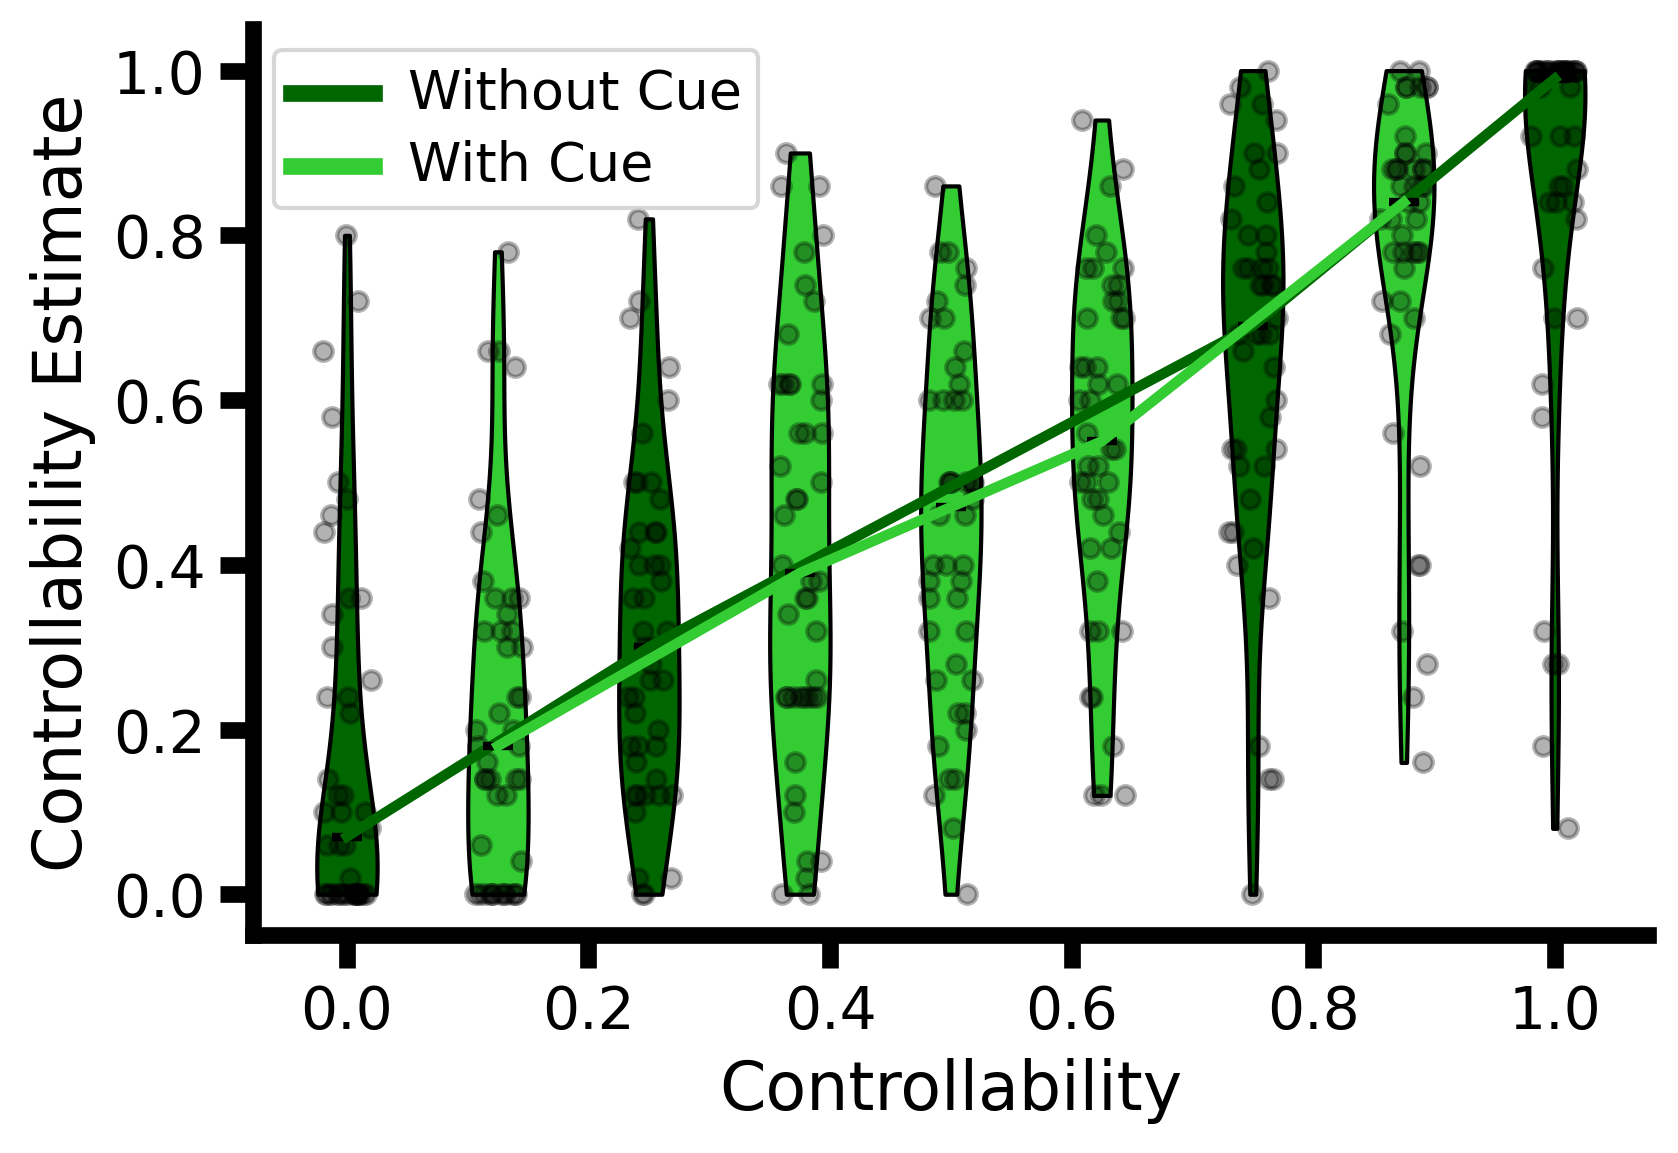

In [5]:
from human_plot_traj_analyses import plot_violin

fig = plot_violin(n_test[0], effs_test[0], n_train[0], effs_train[0], ylabel='Controllability Estimate', median_over_mean = True, xlabel = 'Controllability')


In [6]:
fig.savefig(os.path.join(analysis_folder, 'estimate_violin_groupA.png'))
fig.savefig(os.path.join(analysis_folder, 'estimate_violin_groupA.svg'))

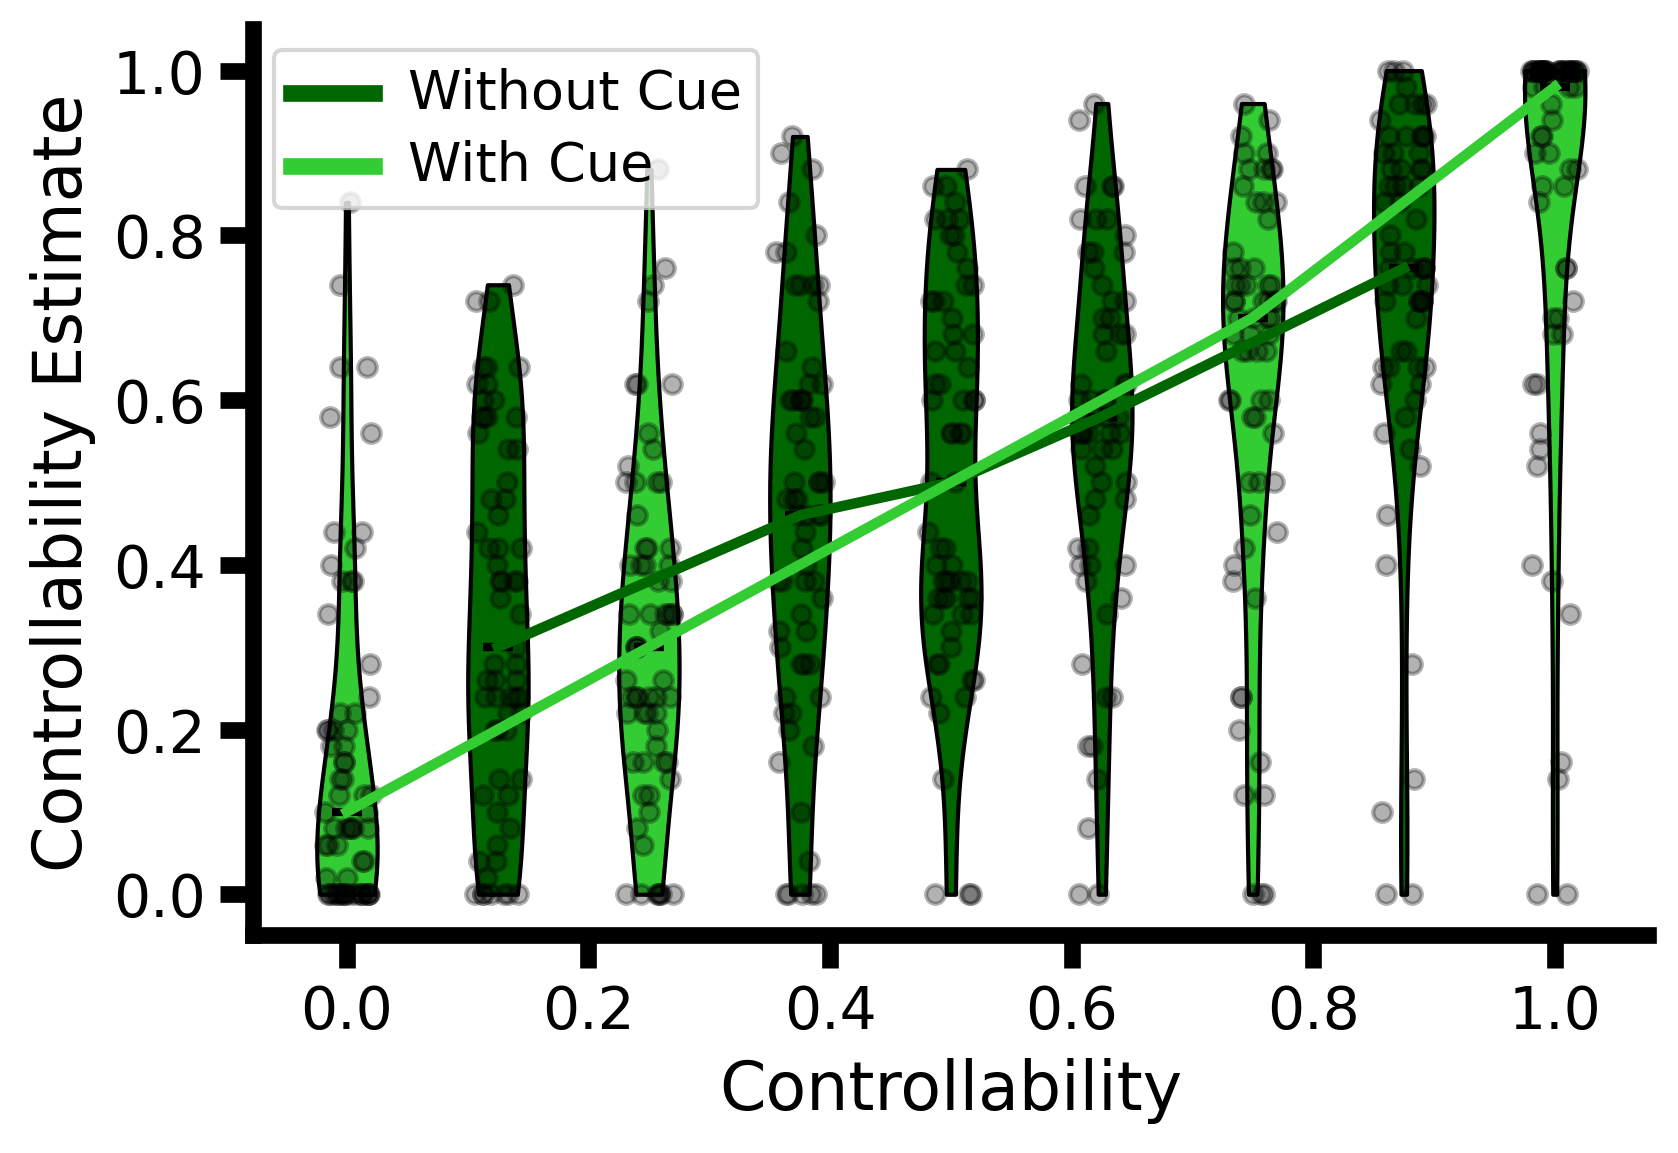

In [7]:
from human_plot_traj_analyses import plot_violin

fig = plot_violin(n_test[1], effs_test[1], n_train[1], effs_train[1], ylabel='Controllability Estimate', median_over_mean = True, xlabel = 'Controllability')

In [8]:
fig.savefig(os.path.join(analysis_folder, 'estimate_violin_groupB.png'))
fig.savefig(os.path.join(analysis_folder, 'estimate_violin_groupB.svg'))

#### Stats

In [9]:
from human_utils_behavioral_analysis import fit_mixed_effects_glm

glm = fit_mixed_effects_glm(df, 'efficacy_estimates')
glm.summary()


/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:            MixedLM Dependent Variable: efficacy_estimates
No. Observations: 999     Method:             REML              
No. Groups:       111     Scale:              0.0484            
Min. group size:  9       Log-Likelihood:     85.9446           
Max. group size:  9       Converged:          Yes               
Mean group size:  9.0                                           
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             -0.077    0.015 -5.050 0.000 -0.107 -0.047
C(group_C)[T.True]    -0.005    0.014 -0.331 0.740 -0.032  0.023
efficacy               0.280    0.022 12.973 0.000  0.238  0.322
Group Var              0.000    0.005                           
================================================================

"""

## SFig 2: Encoding of controllability in neural network representations

In [10]:
from settings_anal import pepe_nn_ape_models as ape_models
from settings_anal import pepe_nn_control_models as control_models
from settings_anal import pepe_nn_efficacy_at_input_models as efficacy_at_input_models
from settings_anal import pepe_nn_decoding_timestamp as timestamp

decoding_folder = os.path.join('results', 'decoding')

metric = 'r2score'
#metric = 'mse'
encdec = 'enc'

# ape_decoding_train_mses = []
# ape_decoding_test_mses = []
ape_decoding_mses = []
ape_decoding_mses_fc = []
for model in ape_models:
    ape_decoding_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_%s_%ss.npy' %(timestamp, encdec, metric))))
    #ape_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_%s_%ss_fc.npy' %(timestamp, encdec, metric))))
    #ape_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_enc_mses_fc.npy' %timestamp)))
    # ape_decoding_train_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_test_taus_train_mses.npy' %timestamp)))
    # ape_decoding_test_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_test_taus_test_mses.npy' %timestamp)))

ape_decoding_mses = np.array(ape_decoding_mses)
#ape_decoding_mses_fc = np.array(ape_decoding_mses_fc)
# ape_decoding_train_mses = np.array(ape_decoding_train_mses)
# ape_decoding_test_mses = np.array(ape_decoding_test_mses)

control_decoding_mses = []
control_decoding_mses_fc = []
for model in control_models:
    control_decoding_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_%s_%ss.npy' %(timestamp, encdec, metric))))
    #control_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_%s_%ss_fc.npy' %(timestamp, encdec, metric))))
    # control_decoding_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses.npy' %timestamp)))
    # control_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses_fc.npy' %timestamp)))

control_decoding_mses = np.array(control_decoding_mses)
#control_decoding_mses_fc = np.array(control_decoding_mses_fc)

efficacy_at_input_decoding_mses = []
#efficacy_at_input_decoding_mses_fc = []
for model in efficacy_at_input_models:
    efficacy_at_input_decoding_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_%s_%ss.npy' %(timestamp, encdec, metric))))
    #efficacy_at_input_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_%s_%ss_fc.npy' %(timestamp, encdec, metric))))
    # efficacy_at_input_decoding_mses.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses.npy' %timestamp)))
    # efficacy_at_input_decoding_mses_fc.append(np.load(os.path.join(decoding_folder, str(model), '%s_ape_model_mses_fc.npy' %timestamp)))

efficacy_at_input_decoding_mses = np.array(efficacy_at_input_decoding_mses)
#efficacy_at_input_decoding_mses_fc = np.array(efficacy_at_input_decoding_mses_fc)

## Read in test_episodes
ape_modelname = ape_models[0]
eval_folder = os.path.join('data', 'eval', 'pepe')

from settings_anal import pepe_nn_ape_lc_timestamp as eval_timestamp

ape_test_rews = []
ape_test_apes_losses = []
ape_test_returns_losses = []
ape_test_apes_mses = []

test_episodes = pickle.load(open(os.path.join(eval_folder, str(ape_modelname), eval_timestamp + '_test_learning_curve_episodes.pkl'), 'rb'))

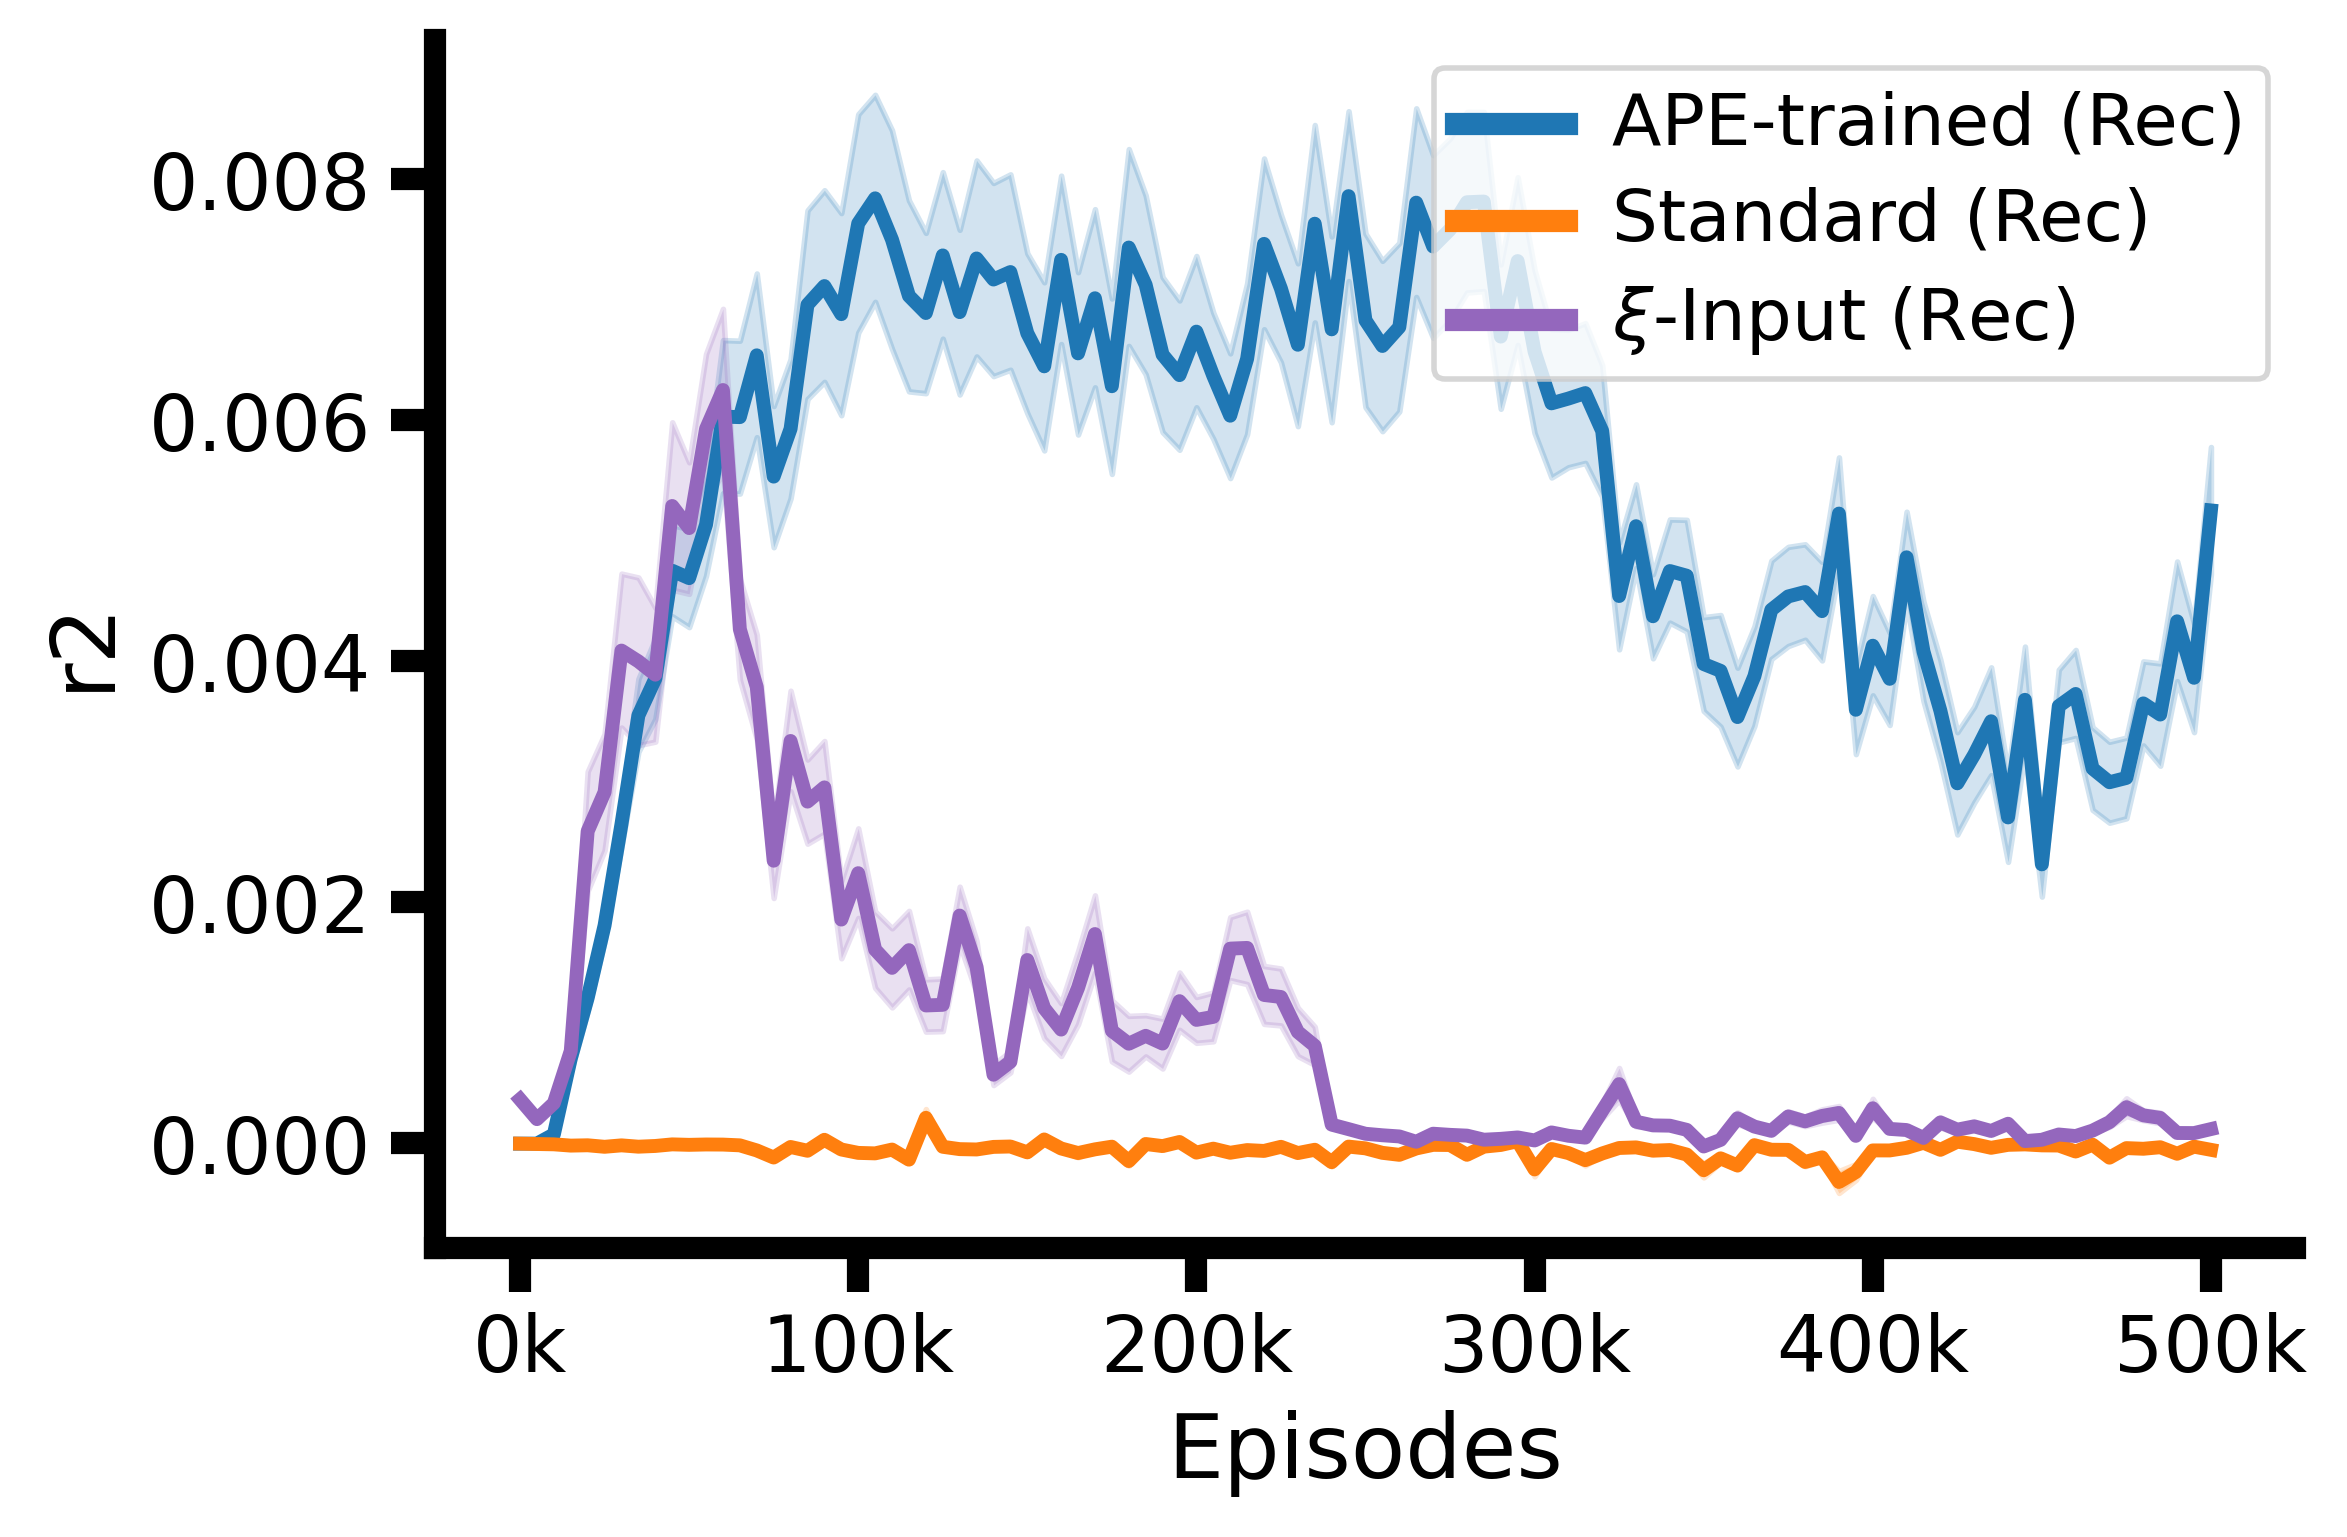

In [12]:
from matplotlib.ticker import FormatStrFormatter
from settings_anal import colors
from settings_anal import names

x_units = 'k'
x_exp = np.array(test_episodes) / 1000

# y_exp_train = ape_decoding_train_mses.T
# means_exp_train = y_exp_train.mean(axis=1)
# stderr_exp_train = y_exp_train.std(axis=1)/np.sqrt(len(y_exp_train))

# y_exp_test = ape_decoding_test_mses.T
# means_exp_test = y_exp_test.mean(axis=1)
# stderr_exp_test = y_exp_test.std(axis=1)/np.sqrt(len(y_exp_test))

y_exp = ape_decoding_mses.T
means_exp = y_exp.mean(axis=1)
stderr_exp = y_exp.std(axis=1)/np.sqrt(len(y_exp))

# y_exp_fc = ape_decoding_mses_fc.T
# means_exp_fc = y_exp_fc.mean(axis=1)
# stderr_exp_fc = y_exp_fc.std(axis=1)/np.sqrt(len(y_exp_fc))

y_control = control_decoding_mses.T
means_control = y_control.mean(axis=1)
stderr_control = y_control.std(axis=1)/np.sqrt(len(y_control))

# y_control_fc = control_decoding_mses_fc.T
# means_control_fc = y_control_fc.mean(axis=1)
# stderr_control_fc = y_control_fc.std(axis=1)/np.sqrt(len(y_control_fc))

y_efficacy_at_input = efficacy_at_input_decoding_mses.T
means_at_input = y_efficacy_at_input.mean(axis=1)
stderr_at_input = y_efficacy_at_input.std(axis=1)/np.sqrt(len(y_efficacy_at_input))

# y_efficacy_at_input_fc = efficacy_at_input_decoding_mses_fc.T
# means_at_input_fc = y_efficacy_at_input_fc.mean(axis=1)
# stderr_at_input_fc = y_efficacy_at_input_fc.std(axis=1)/np.sqrt(len(y_efficacy_at_input_fc))

### set up figure
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)

### plot
ax.plot(x_exp, means_exp, color='C0', label='APE-trained (Rec)')
#ax.plot(x_exp, means_exp, color='C0', label='Rec. APE-trained')
ax.fill_between(x_exp, means_exp - stderr_exp, means_exp + stderr_exp, color='C0', alpha=0.2)


ax.plot(x_exp, means_control, color='C1', label=names['noape'] + " (Rec)")
ax.fill_between(x_exp, means_control - stderr_control, means_control + stderr_control, color='C1', alpha=0.2)


#ax.plot(x_exp, means_at_input, color=colors['efficacy_at_input'], label=names['efficacy_at_input'] + " (Rec)")
ax.plot(x_exp, means_at_input, color=colors['efficacy_at_input'], label=names['efficacy_at_input'] + " (Rec)")
ax.fill_between(x_exp, means_at_input - stderr_at_input, means_at_input + stderr_at_input, color='C4', alpha=0.2)


# #ax.plot(x_exp, means_exp_fc, color='navy', label='Fully-Connected', linestyle='dashed',)
# ax.plot(x_exp, means_exp_fc, color='navy', label='APE-trained (FC)', linestyle='dashed',)
# ax.fill_between(x_exp, means_exp - stderr_exp, means_exp + stderr_exp, color='C0', alpha=0.2)

# # ax.plot(x_exp, means_exp_train, color='lightblue', label='APE-trained trained efficacies', linestyle='--')
# # ax.fill_between(x_exp, means_exp - stderr_exp, means_exp + stderr_exp, color='lightblue', alpha=0.2)

# # ax.plot(x_exp, means_exp_test, color='darkblue', label='APE-trained test efficacies', linestyle='--')
# # ax.fill_between(x_exp, means_exp_test - stderr_exp_test, means_exp_test + stderr_exp_test, color='darkblue', alpha=0.2)


# ax.plot(x_exp, means_control_fc, color='chocolate', label=names['noape'] + " (FC)", linestyle='dashed',)
# ax.fill_between(x_exp, means_control_fc - stderr_control_fc, means_control_fc + stderr_control_fc, color='C1', alpha=0.2)

# # if y_baselines is not None:
# #     ax.plot(x_baselines, means_baselines, color='C2', label=label_baselines, marker=marker)
# #     ax.fill_between(x_baselines, means_baselines - stderr_baselines, means_baselines + stderr_baselines, color='C2', alpha=0.2)

# ax.plot(x_exp, means_at_input_fc, color='purple', label=names['efficacy_at_input'] + " (FC)", linestyle='dashed',)
# ax.fill_between(x_exp, means_at_input_fc - stderr_at_input_fc, means_at_input_fc + stderr_at_input_fc, color='C4', alpha=0.2)

### format axis
ax.set_xlabel('Episodes')
ax.set_ylabel('R2')
#ax.set_ylabel('MSE')
#ax.set_title(title)

ax.xaxis.set_major_formatter(FormatStrFormatter('%dk'))

ax.legend()

#ax.set_ylim((24,28))

format_axis(ax)


In [13]:
fig.savefig(os.path.join(analysis_folder, 'enc_mse.png'))
fig.savefig(os.path.join(analysis_folder, 'enc_mse.svg'))

### Stats

In [24]:
ape_decodings = ape_decoding_mses[:,-1]
control_decodings = control_decoding_mses[:,-1]
efficacy_at_input_decodings = efficacy_at_input_decoding_mses[:,-1]

print("Mean APE ", ape_decodings.mean())
print("StdErr APE ", ape_decodings.std()/np.sqrt(len(ape_decodings)))

print("Mean Control ", control_decodings.mean())
print("StdErr Control ", control_decodings.std()/np.sqrt(len(control_decodings)))

print("Mean Efficacy at Input ", efficacy_at_input_decodings.mean())
print("StdErr Efficacy at Input ", efficacy_at_input_decodings.std()/np.sqrt(len(efficacy_at_input_decodings)))

from scipy.stats import ttest_ind

print(ttest_ind(ape_decodings, control_decodings, alternative='greater'))
print(ttest_ind(ape_decodings, efficacy_at_input_decodings, alternative='greater'))

Mean APE  0.005253385494428731
StdErr APE  0.0016723435878937363
Mean Control  -5.3409600127451995e-05
StdErr Control  3.381768638762677e-05
Mean Efficacy at Input  0.00011870053146783022
StdErr Efficacy at Input  4.5933662397240014e-05
TtestResult(statistic=3.0098114292172395, pvalue=0.0037615623395031174, df=18.0)
TtestResult(statistic=2.9116943949583067, pvalue=0.004653612019188762, df=18.0)


## SFig 3: Mistraining Performance

## Stats: Performance improvements

In [21]:
from human_utils_project import get_clean_data

day1_test_mask_cutoff = {
    "groupA": {"lower": 10, "upper": 90},
    "groupB": {"lower": 8, "upper": 72}
}

#day1_test_mask_cutoff = None

exp_date = '24-01-22-29'

group = None

df_day1, effs_train_day1, effs_test_day1, test_start_day1 = get_clean_data(day=1, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group= group, file_base=human_data_file_base)
df_day2, effs_train_day2, effs_test_day2, test_start_day2 = get_clean_data(day=2, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
df_day3, effs_train_day3, effs_test_day3, test_start_day3 = get_clean_data(day=3, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, group=group, file_base=human_data_file_base)
effs = np.arange(0, 1.01, 0.125)
n_steps = 50

## WITH INNER JOIN SO THAT ONLY ROWS FROM ALL THREE DAYS ARE KEPT
df = df_day1.join(df_day2, how='outer', lsuffix='_day1', rsuffix='_day2')
df = df.join(df_day3.rename(columns=lambda x: f"{x}_day3"), how='inner')


In [22]:
from human_utils_project import sort_train_test

rews_train_day1, rews_test_day1 = sort_train_test(df_day1['rewards_tallies'], df_day1['effs'], test_start_day1, group = df_day1['group'])
rews_train_day2, rews_test_day2 = sort_train_test(df_day2['rewards_tallies'], df_day2['effs'], test_start_day2, group = df_day2['group'])
rews_train_day3, rews_test_day3 = sort_train_test(df_day3['rewards_tallies'], df_day3['effs'], test_start_day3, group = df_day3['group'])

In [23]:
effs_test_day1

([0.125, 0.375, 0.5, 0.625, 0.875], [0, 0.25, 0.75, 1.0])

In [32]:
from scipy.stats import ttest_ind, ttest_rel

## AGGREGATED

all_rews_day1 = [np.concatenate((rews_train, rews_test), axis=1) for rews_train, rews_test in zip(rews_train_day1, rews_test_day1)]
all_rews_day1 = np.concatenate(all_rews_day1, axis=0).sum(axis=1)

all_rews_day2 = [np.concatenate((rews_train, rews_test), axis=1) for rews_train, rews_test in zip(rews_train_day2, rews_test_day2)]
all_rews_day2 = np.concatenate(all_rews_day2, axis=0).sum(axis=1)

mean_day1 = all_rews_day1.mean()
mean_day2 = all_rews_day2.mean()

stderr_day1 = all_rews_day1.std()/np.sqrt(len(all_rews_day1))
stderr_day2 = all_rews_day2.std()/np.sqrt(len(all_rews_day2))

## one sided paired t-test
print("OVERALL TEST")
t_stat, pv = ttest_ind(all_rews_day1, all_rews_day2, alternative='less')
print("Day 1 Mean and SEM", mean_day1, stderr_day1)
print("Day 2 Mean and SEM", mean_day2, stderr_day2)
print("t-statistic", t_stat)
print("p-value", pv)

print("N", len(all_rews_day1))
print("DoF", len(all_rews_day1) - 1)


## UNPAIRED T-TEST AT GIVEN EFFICACY LEVEL:

for ieff, eff in enumerate(np.arange(0, 1.01, 0.125)):
    group_day1 = int(eff in effs_test_day1[1])

    rews_day1 = rews_test_day1[group_day1][:, effs_test_day1[group_day1].index(eff)]
    rews_day2 = rews_test_day2[1 - group_day1][:, effs_test_day2[1 - group_day1].index(eff)]

    ## one sided unpaired t-test
    t_stat, pv = ttest_ind(rews_day1, rews_day2, alternative='less')
    print('efficacy: %.3f, mean day 1: %.2f, mean day 2: %.2f: t-statistic: %.2f, p-value: %.2f' %(eff, np.mean(rews_day1), np.mean(rews_day2), t_stat, pv))
    #print(t_stat, pv)

OVERALL TEST
Day 1 Mean and SEM 224.05494505494505 1.5095342702307768
Day 2 Mean and SEM 226.64285714285714 1.4195593348986304
t-statistic -1.2454607959878339
p-value 0.10688397868275186
N 182
DoF 181
0.31551428735022574 0.6236316437040674
-0.021906874700930053 0.4912732531595079
-0.8485158027938908 0.1986388768349871
-0.25014506740901343 0.4013802162366851
-0.2898048220409273 0.38614956011169
-1.363693543959048 0.0871835136999627
-0.5932960693846956 0.27686388854187427
0.9547109190291807 0.829497856754514
-0.5523862606866193 0.2906844983321019


In [29]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

# Initialize a list to store the results
results = []

for ieff, eff in enumerate(np.arange(0, 1.01, 0.125)):
    group_day1 = int(eff in effs_test_day1[1])

    rews_day1 = rews_test_day1[group_day1][:, effs_test_day1[group_day1].index(eff)]
    rews_day2 = rews_test_day2[1 - group_day1][:, effs_test_day2[1 - group_day1].index(eff)]

    # Perform one sided unpaired t-test
    t_stat, pv = ttest_ind(rews_day1, rews_day2, alternative='less')

    # Calculate degrees of freedom
    df = len(rews_day1) + len(rews_day2) - 2

    # Calculate mean and standard error for each day
    mean_day1 = np.mean(rews_day1)
    stderr_day1 = np.std(rews_day1) / np.sqrt(len(rews_day1))
    mean_day2 = np.mean(rews_day2)
    stderr_day2 = np.std(rews_day2) / np.sqrt(len(rews_day2))

    # Append results to the list
    results.append([eff, mean_day1, stderr_day1, mean_day2, stderr_day2, t_stat, df, pv])

# Convert the list to a DataFrame
df_results = pd.DataFrame(results, columns=['Efficacy', 'Mean Day 1', 'StdErr Day 1', 'Mean Day 2', 'StdErr Day 2', 'T-statistic', 'df', 'P-value'])

# Perform Holm-Bonferroni correction
rejects, p_values_corrected, _, _ = multipletests(df_results['P-value'], alpha=0.05, method='holm')

# Add the corrected p-values and rejection decisions to the DataFrame
df_results['P-value corrected'] = p_values_corrected
df_results['Reject H0'] = rejects

# Set "Efficacy" to index column
#df_results.set_index('Efficacy', inplace=True, drop=True)

df_results = df_results.round(3)

# Print the DataFrame
df_results

,Efficacy,Mean Day 1,StdErr Day 1,Mean Day 2,StdErr Day 2,T-statistic,df,P-value,P-value corrected,Reject H0
0,0.000,23.177,0.410,22.988,0.430,0.316,180,0.624,1.000,False
1,0.125,23.674,0.472,23.688,0.370,-0.022,180,0.491,1.000,False
2,0.250,23.344,0.402,23.860,0.456,-0.849,180,0.199,1.000,False
3,0.375,24.488,0.488,24.646,0.400,-0.250,180,0.401,1.000,False
4,0.500,24.640,0.524,24.844,0.468,-0.290,180,0.386,1.000,False
5,0.625,25.151,0.445,26.052,0.477,-1.364,180,0.087,0.785,False
6,0.750,26.635,0.550,27.093,0.528,-0.593,180,0.277,1.000,False
7,0.875,27.744,0.577,26.896,0.658,0.955,180,0.829,1.000,False
8,1.000,26.750,0.761,27.337,0.726,-0.552,180,0.291,1.000,False


In [38]:
## COMPARING REWARDS FROM DAY 2 TRAIN TO DAY 2 TEST

for effs_train_day, rews_train_day, rews_test_day in zip([effs_train_day2, effs_train_day3], [rews_train_day2, rews_train_day3], [rews_test_day2, rews_test_day3]):
    for i, eff_set in enumerate(effs_train_day2):
        rews_train = rews_train_day2[i].mean(axis=1)
        rews_test = rews_test_day2[1-i].mean(axis=1)

        t_stat, pv = ttest_ind(rews_train, rews_test)

        print("Group", i)
        print("Eff Set", eff_set)
        print("N Train", len(rews_train))
        print("Mean Train", rews_train.mean())
        print("Standard Error Train", rews_train.std()/np.sqrt(len(rews_train)))
        print("N Test", len(rews_test))
        print("Mean Test", rews_test.mean())
        print("Standard Error Test", rews_test.std()/np.sqrt(len(rews_test)))
        df = len(rews_train) + len(rews_test) - 2        
        print("t-statistic", t_stat)
        print("p-value", pv)

Group 0
Eff Set [0.125, 0.375, 0.5, 0.625, 0.875]
N Train 86
Mean Train 25.020930232558143
Standard Error Train 0.27463588303532793
N Test 96
Mean Test 25.224999999999998
Standard Error Test 0.24185068425006
t-statistic -0.5567754679938033
p-value 0.578372435020805
Group 1
Eff Set [0, 0.25, 0.75, 1.0]
N Train 96
Mean Train 25.1875
Standard Error Train 0.26952810485282525
N Test 86
Mean Test 25.319767441860463
Standard Error Test 0.3100437859106888
t-statistic -0.3216821836911876
p-value 0.7480667261170812
Group 0
Eff Set [0.125, 0.375, 0.5, 0.625, 0.875]
N Train 86
Mean Train 25.020930232558143
Standard Error Train 0.27463588303532793
N Test 96
Mean Test 25.224999999999998
Standard Error Test 0.24185068425006
t-statistic -0.5567754679938033
p-value 0.578372435020805
Group 1
Eff Set [0, 0.25, 0.75, 1.0]
N Train 96
Mean Train 25.1875
Standard Error Train 0.26952810485282525
N Test 86
Mean Test 25.319767441860463
Standard Error Test 0.3100437859106888
t-statistic -0.3216821836911876
p-val

In [40]:
import pandas as pd
from scipy.stats import ttest_ind

from statsmodels.sandbox.stats.multicomp import multipletests


# Initialize a list to store the results
results = []

for effs_train_day, rews_train_day, rews_test_day in zip([effs_train_day2, effs_train_day3], [rews_train_day2, rews_train_day3], [rews_test_day2, rews_test_day3]):
    for i, eff_set in enumerate(effs_train_day2):
        rews_train = rews_train_day2[i].mean(axis=1)
        rews_test = rews_test_day2[1 - i].mean(axis=1)

        t_stat, pv = ttest_ind(rews_train, rews_test)

        # Calculate mean, standard error and DoF
        mean_train = rews_train.mean()
        stderr_train = rews_train.std()/np.sqrt(len(rews_train))
        mean_test = rews_test.mean()
        stderr_test = rews_test.std()/np.sqrt(len(rews_test))
        df = len(rews_train) + len(rews_test) - 2

        # Append results to the list
        results.append([i, eff_set, len(rews_train), mean_train, stderr_train, len(rews_test), mean_test, stderr_test, df, t_stat, pv])

# Convert the list to a DataFrame
df_results = pd.DataFrame(results, columns=['Group', 'Eff Set', 'N Train', 'Mean Train', 'StdErr Train', 'N Test', 'Mean Test', 'StdErr Test', 'DoF', 'T-statistic', 'P-value'])

# Perform multiple comparisons correction
rejects, p_values_corrected, _, _ = multipletests(df_results['P-value'], alpha=0.05, method='holm')

# Add the corrected p-values and rejection decisions to the DataFrame
df_results['P-value corrected'] = p_values_corrected
df_results['Reject H0'] = rejects


# Print the DataFrame
df_results.round(3)

,Group,Eff Set,N Train,Mean Train,StdErr Train,N Test,Mean Test,StdErr Test,DoF,T-statistic,P-value,P-value corrected,Reject H0
0,0,"[0.125, 0.375, 0.5, 0.625, 0.875]",86,25.021,0.275,96,25.225,0.242,180,-0.557,0.578,1.0,False
1,1,"[0, 0.25, 0.75, 1.0]",96,25.188,0.270,86,25.320,0.310,180,-0.322,0.748,1.0,False
2,0,"[0.125, 0.375, 0.5, 0.625, 0.875]",86,25.021,0.275,96,25.225,0.242,180,-0.557,0.578,1.0,False
3,1,"[0, 0.25, 0.75, 1.0]",96,25.188,0.270,86,25.320,0.310,180,-0.322,0.748,1.0,False


## Transdiagnostics Aggregated Similarities Bar Plot

In [ ]:
from human_utils_behavioral_analysis import upper_tri_masking
from human_utils_transdiagnostics import compute_quantile_analysis
from sklearn.utils import resample

def combine_group_td_quantile_matrices(values, effs, tds, groups, num_bins=9, flip_leastmost = False):
    
    quantile_matrix_g1, bins_g1 = compute_quantile_analysis(np.stack(values[~groups].values), tds[~groups], np.stack(effs[~groups].values), num_bins=num_bins, flip_leastmost=flip_leastmost)
    quantile_matrix_g2, bins_g2 = compute_quantile_analysis(np.stack(values[groups].values), tds[groups], np.stack(effs[groups].values), num_bins=num_bins, flip_leastmost = flip_leastmost)

    quantile_matrix = (~groups).sum() / len(df) * quantile_matrix_g1 + (groups).sum() / len(df) * quantile_matrix_g2

    return quantile_matrix

def compute_cosine_similarity(a, b, upper_tri = True):
    from sklearn.metrics.pairwise import cosine_similarity
    if upper_tri:
        a = upper_tri_masking(a)
        b = upper_tri_masking(b)
    return cosine_similarity(a.reshape((1,-1)), b.reshape((1,-1)))[0][0]


def compute_resampled_td_cosine_similarity(item, groups,  item_effs, td, comparison, sim_participant_perturbations, effs = np.arange(0, 1.01, 0.125), n_iterations = 100, flip_leastmost=False):

    bootstrapped_cos_sims = []
    for _ in range(n_iterations):
        indicesA = item.index[np.where(groups == False)[0]]
        indicesB = item.index[np.where(groups == True)[0]]

        bootstrapped_indicesA = resample(indicesA, replace=True, n_samples=len(indicesA))
        bootstrapped_indicesB = resample(indicesB, replace=False, n_samples=len(indicesB))
        bootstrapped_indices = np.sort(np.concatenate((bootstrapped_indicesA, bootstrapped_indicesB)))

        #bootstrapped_indices_comparison = resample(np.arange(len(comparison)), replace=True, n_samples=len(comparison))

        #bootstrapped_data_corr, bootstrapped_data_pvs = combine_group_correlation_matrices(item.loc[bootstrapped_indices], df.loc[bootstrapped_indices, 'effs_day2'], df.loc[bootstrapped_indices, 'group_day2'].values)
        #bootstrapped_data_corr, bootstrapped_data_pvs = combine_group_correlation_matrices(item.loc[bootstrapped_indices], item_effs.loc[bootstrapped_indices], groups.loc[bootstrapped_indices], covar=covar_subindexed, effs_covar=effs_covar_subindexed, values2=item2_subindexed, effs2 = item2_effs_subindexed)
        bootstrapped_data_tds = combine_group_td_quantile_matrices(item.loc[bootstrapped_indices], item_effs.loc[bootstrapped_indices], td, groups.loc[bootstrapped_indices].values, num_bins=9, flip_leastmost=flip_leastmost)
        #bootstrapped_comp_corr, bootstrapped_comp_pvs = compute_2D_correlation_matrices(comparison, comparison2, effs, effs)
        bootstrapped_sim_tds, _ = compute_quantile_analysis(comparison, sim_participant_perturbations, effs, num_bins=9, take_quantile_on_col1=False)

        ## min-max norm of sim_tds
        bootstrapped_data_tds = (bootstrapped_data_tds - bootstrapped_data_tds.min())/(bootstrapped_data_tds.max() - bootstrapped_data_tds.min())
        ## min-max norm of sim_tds
        bootstrapped_sim_tds = (bootstrapped_sim_tds - bootstrapped_sim_tds.min())/(bootstrapped_sim_tds.max() - bootstrapped_sim_tds.min())

        bootstrapped_cos_sim = compute_cosine_similarity(bootstrapped_data_tds, bootstrapped_sim_tds, upper_tri = False)
        bootstrapped_cos_sims.append(bootstrapped_cos_sim)
    return bootstrapped_cos_sims


In [ ]:
n_iterations=100

rows = []

### TASK 1
mask = 'nomask'
iday = 2
day = 'day%d' %iday
exp_date = '24-01-22-29'
with_nets = False
include_sleep = False
include_estimates = False
day1_test_mask_cutoff = None    
group = None

analysis_folder = os.path.join('panels', 'fig_transdiags')

df, effs_sorted_train, effs_sorted_test, test_start = get_clean_combined_data(day = iday, group = group, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, file_base = human_data_file_base)
n_train = len(effs_sorted_train)
n_test = len(effs_sorted_test)

from human_utils_behavioral_analysis import compute_2D_correlation, load_simulated_participants_across_models
from settings_anal import pepe_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t1 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t1 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, _ = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)

## flip to correct for switching from tau to efficacy
sim_obss = np.flip(sim_obss.T,axis=1)
sim_rewss = np.flip(sim_rewss.T, axis=1)

original_mag_perturbation = 1
with open(os.path.join('data', 'sim_perturbed_participants', 'pepe', 'sim', 'mag%d'%(original_mag_perturbation*100), '%s_simulated_participant_perturbations_sim_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

#for item_name, item, comparison in zip(['Observes', 'Rewards'], [df['n_observes'], df['rewards_tallies']], [sim_obss,sim_rewss]):
for item_name, item, comparison in zip(['Rewards', 'Observes'], [df['rewards_tallies'], df['n_observes']], [sim_rewss,sim_obss]):
    for td_name in ['AD', 'Compul', 'SW']:
        td = df[td_name]
        if td_name == 'AD':
            flip_leastmost = True
        else:
            flip_leastmost = False
        data_tds = combine_group_td_quantile_matrices(item, df['effs'], td, df['group'].values, flip_leastmost=flip_leastmost)
        
        sim_tds, _ = compute_quantile_analysis(comparison, sim_participant_perturbations, effs, num_bins=9, take_quantile_on_col1=False)

        ## min-max norm of sim_tds
        data_tds = (data_tds - data_tds.min())/(data_tds.max() - data_tds.min())
        ## min-max norm of sim_tds
        sim_tds = (sim_tds - sim_tds.min())/(sim_tds.max() - sim_tds.min())

        cos_sim = compute_cosine_similarity(data_tds, sim_tds, upper_tri=False)

        bootstrapped_cos_sims = compute_resampled_td_cosine_similarity(item, df['group'], df['effs'], td, comparison, sim_participant_perturbations, n_iterations=n_iterations, flip_leastmost=flip_leastmost)
        ci = pd.Series(bootstrapped_cos_sims).quantile([0.025, 0.975])
        #assert cos_sim > ci.iloc[0] and cos_sim < ci.iloc[1], "cosim out of range" + str(bootstrapped_cos_sims)
        rows.append({"task": "T1", "Transdiagnostic": td_name, "item": item_name,"Cosine Similarity": cos_sim, "Lower": ci.iloc[0], "Upper": ci.iloc[1]})

### TASK 2
mask = 'nomask'
iday = 3
day = 'day%d' %iday
exp_date = '24-01-22-29'
with_nets = False
include_sleep = False
include_estimates = False
day1_test_mask_cutoff = None    
group = None

analysis_folder = os.path.join('panels', 'fig_transdiags')

df, effs_sorted_train, effs_sorted_test, test_start = get_clean_combined_data(day = iday, group = group, exp_date=exp_date, day1_test_mask_cutoff=day1_test_mask_cutoff, file_base = human_data_file_base)
n_train = len(effs_sorted_train)
n_test = len(effs_sorted_test)

from settings_anal import levc_human_ape_models as ape_models
from settings_anal import trait_simulated_participants_folder_t2 as simulated_participants_folder
from settings_anal import trait_sim_timestamp_t2 as sim_timestamp

effs = np.arange(0, 1.01, 0.125)

sim_rewss, sim_obss, sim_sleepss = load_simulated_participants_across_models(simulated_participants_folder, ape_models, sim_timestamp, include_sleep=True)
sim_rewss = sim_rewss.mean(axis=0)
sim_obss = sim_obss.mean(axis=0)
sim_sleepss = sim_sleepss.mean(axis=0)

## flip to correct for switching from tau to efficacy
sim_obss = np.flip(sim_obss.T,axis=1)
sim_sleepss = np.flip(sim_sleepss.T, axis=1)
sim_rewss = np.flip(sim_rewss.T, axis=1)

# mag_perturbation = 0.5
# bias_perturbation=-1
from settings_anal import trait_sim_mag_perturbation as mag_perturbation
from settings_anal import trait_sim_bias_perturbation as bias_perturbation
with open(os.path.join('data', 'sim_perturbed_participants', 'levc', 'sim', 'mag%dbias%d'%(mag_perturbation*100, bias_perturbation*100), '%s_simulated_participant_perturbations_sim_mag.pkl' %sim_timestamp), 'rb') as f:
    sim_participant_perturbations = - pickle.load(f) ## multiply by -1 to convert from tau to efficacy

# for item_name, item, comparisons in zip(['Sleeps', 'Obs', 'Rews'],
#                                          [df['n_sleeps'], df['n_observes'], df['rewards_tallies']], 
#                                          [sim_sleepss, sim_obss, sim_rewss]):
for item_name, item, comparisons in zip(['Rews', 'Sleeps', 'Obs', ],
                                         [df['rewards_tallies'], df['n_sleeps'], df['n_observes'],], 
                                         [sim_sleepss, sim_obss, sim_rewss]):
    for td_name in ['AD', 'Compul', 'SW']:
        td = df[td_name]
        if td_name == 'AD':
            flip_leastmost = True
        else:
            flip_leastmost = False
        data_tds = combine_group_td_quantile_matrices(item, df['effs'], td, df['group'].values, flip_leastmost=flip_leastmost,)
        sim_tds, _ = compute_quantile_analysis(comparison, sim_participant_perturbations, effs, num_bins=9, take_quantile_on_col1=False)
        
        ## min-max norm of sim_tds
        data_tds = (data_tds - data_tds.min())/(data_tds.max() - data_tds.min())
        ## min-max norm of sim_tds
        sim_tds = (sim_tds - sim_tds.min())/(sim_tds.max() - sim_tds.min())

        print(data_tds, sim_tds)

        cos_sim = compute_cosine_similarity(data_tds, sim_tds, upper_tri=False)

        bootstrapped_cos_sims = compute_resampled_td_cosine_similarity(item, df['group'], df['effs'], td, comparison, sim_participant_perturbations, n_iterations=n_iterations, flip_leastmost=flip_leastmost)
        ci = pd.Series(bootstrapped_cos_sims).quantile([0.025, 0.975])
        rows.append({"task": "T2", "Transdiagnostic": td_name, "item": item_name, "Cosine Similarity": cos_sim, "Lower": ci.iloc[0], "Upper": ci.iloc[1]})
        
### COMBINATION
df_cosim = pd.DataFrame(rows)

df_cosim['Name'] = df_cosim['task'] + ' ' + df_cosim['item']

print(df_cosim.head())

KeyboardInterrupt: 

In [ ]:
df_cosim = pd.read_pickle((os.path.join(analysis_folder, 'df_cosim.pkl')))

In [ ]:
df_cosim['Name2'] = df_cosim['task'] + ' ' + df_cosim['item']
df_cosim

,task,Transdiagnostic,item,Comparison,Cosine Similarity,Lower,Upper,Name,Name2
0,T1,AD,Rews,Trait,0.845612,0.751550,0.839653,T1 Rews AD,T1 Rews
1,T1,AD,Rews,Zeros,0.669225,0.610285,0.673664,T1 Rews AD,T1 Rews
2,T1,Compul,Rews,Trait,0.808826,0.759559,0.838428,T1 Rews Compul,T1 Rews
3,T1,Compul,Rews,Zeros,0.648540,0.597674,0.678439,T1 Rews Compul,T1 Rews
4,T1,SW,Rews,Trait,0.833818,0.757758,0.845636,T1 Rews SW,T1 Rews
5,T1,SW,Rews,Zeros,0.667585,0.605636,0.676911,T1 Rews SW,T1 Rews
6,T1,AD,Obs,Trait,0.798918,0.665491,0.818832,T1 Obs AD,T1 Obs
7,T1,AD,Obs,Zeros,0.631560,0.636302,0.740836,T1 Obs AD,T1 Obs
8,T1,Compul,Obs,Trait,0.820286,0.638438,0.803984,T1 Obs Compul,T1 Obs
9,T1,Compul,Obs,Zeros,0.618877,0.625361,0.736868,T1 Obs Compul,T1 Obs


/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

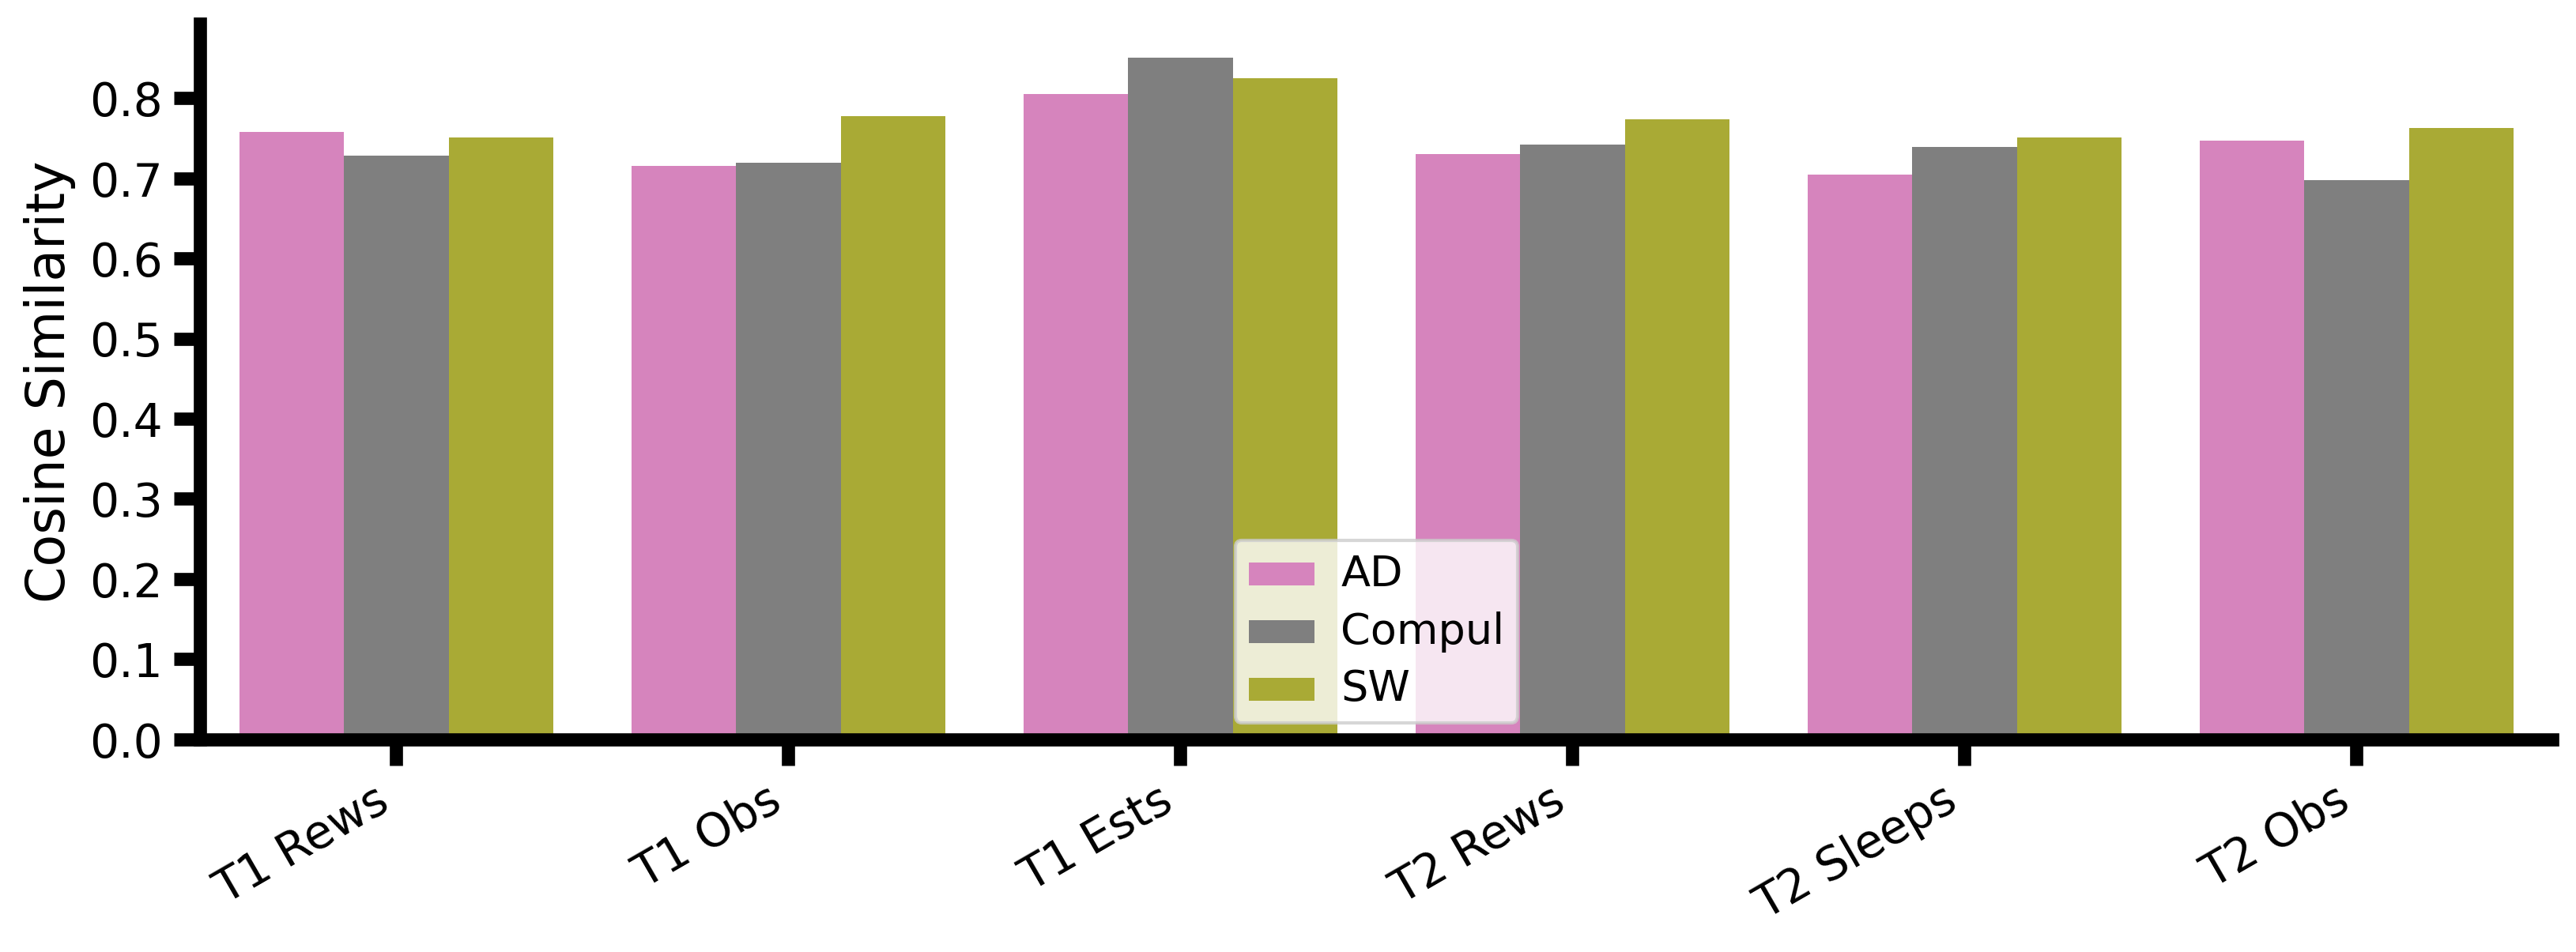

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(12.8, 4), dpi=300)
ax = fig.add_subplot(111)

### Create a Seaborn 
s = sns.barplot(x='Name2', y='Cosine Similarity', hue='Transdiagnostic',  ci=None, data=df_cosim[df_cosim['Comparison'] != "Similarity Difference"], ax=ax, palette=['C6', 'C7', 'C8'])
s.get_legend().set_title(None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xlabel(None)

format_axis(ax)

In [ ]:
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot.png'))
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot.svg'))

## Other Trandiagnostic bar plot figures

In [ ]:
df_cosim

,task,Transdiagnostic,item,Comparison,Cosine Similarity,Lower,Upper,Name
0,T1,PC1,Rews,Trait,0.848715,0.686868,0.832335,T1 Rews
1,T1,PC1,Rews,Zeros,0.854056,0.724106,0.845452,T1 Rews
2,T1,PC2,Rews,Trait,0.804389,0.693887,0.822248,T1 Rews
3,T1,PC2,Rews,Zeros,0.849338,0.718261,0.863184,T1 Rews
10,T1,PC1,Obs,Trait,0.638157,0.452829,0.724108,T1 Obs
11,T1,PC1,Obs,Zeros,0.604524,0.416325,0.650911,T1 Obs
12,T1,PC2,Obs,Trait,0.310717,0.095932,0.476944,T1 Obs
13,T1,PC2,Obs,Zeros,0.651538,0.465438,0.682817,T1 Obs
20,T1,PC1,Ests,Trait,0.340431,0.290403,0.376091,T1 Ests
21,T1,PC1,Ests,Zeros,0.961438,0.908503,0.963942,T1 Ests


In [ ]:
df_cosim

,task,Transdiagnostic,item,Comparison,Cosine Similarity,Lower,Upper,Name
0,T1,PC1,Rews,Trait,0.848715,0.686868,0.832335,T1 Rews
1,T1,PC1,Rews,Zeros,0.854056,0.724106,0.845452,T1 Rews
2,T1,PC2,Rews,Trait,0.804389,0.693887,0.822248,T1 Rews
3,T1,PC2,Rews,Zeros,0.849338,0.718261,0.863184,T1 Rews
10,T1,PC1,Obs,Trait,0.638157,0.452829,0.724108,T1 Obs
11,T1,PC1,Obs,Zeros,0.604524,0.416325,0.650911,T1 Obs
12,T1,PC2,Obs,Trait,0.310717,0.095932,0.476944,T1 Obs
13,T1,PC2,Obs,Zeros,0.651538,0.465438,0.682817,T1 Obs
20,T1,PC1,Ests,Trait,0.340431,0.290403,0.376091,T1 Ests
21,T1,PC1,Ests,Zeros,0.961438,0.908503,0.963942,T1 Ests


/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

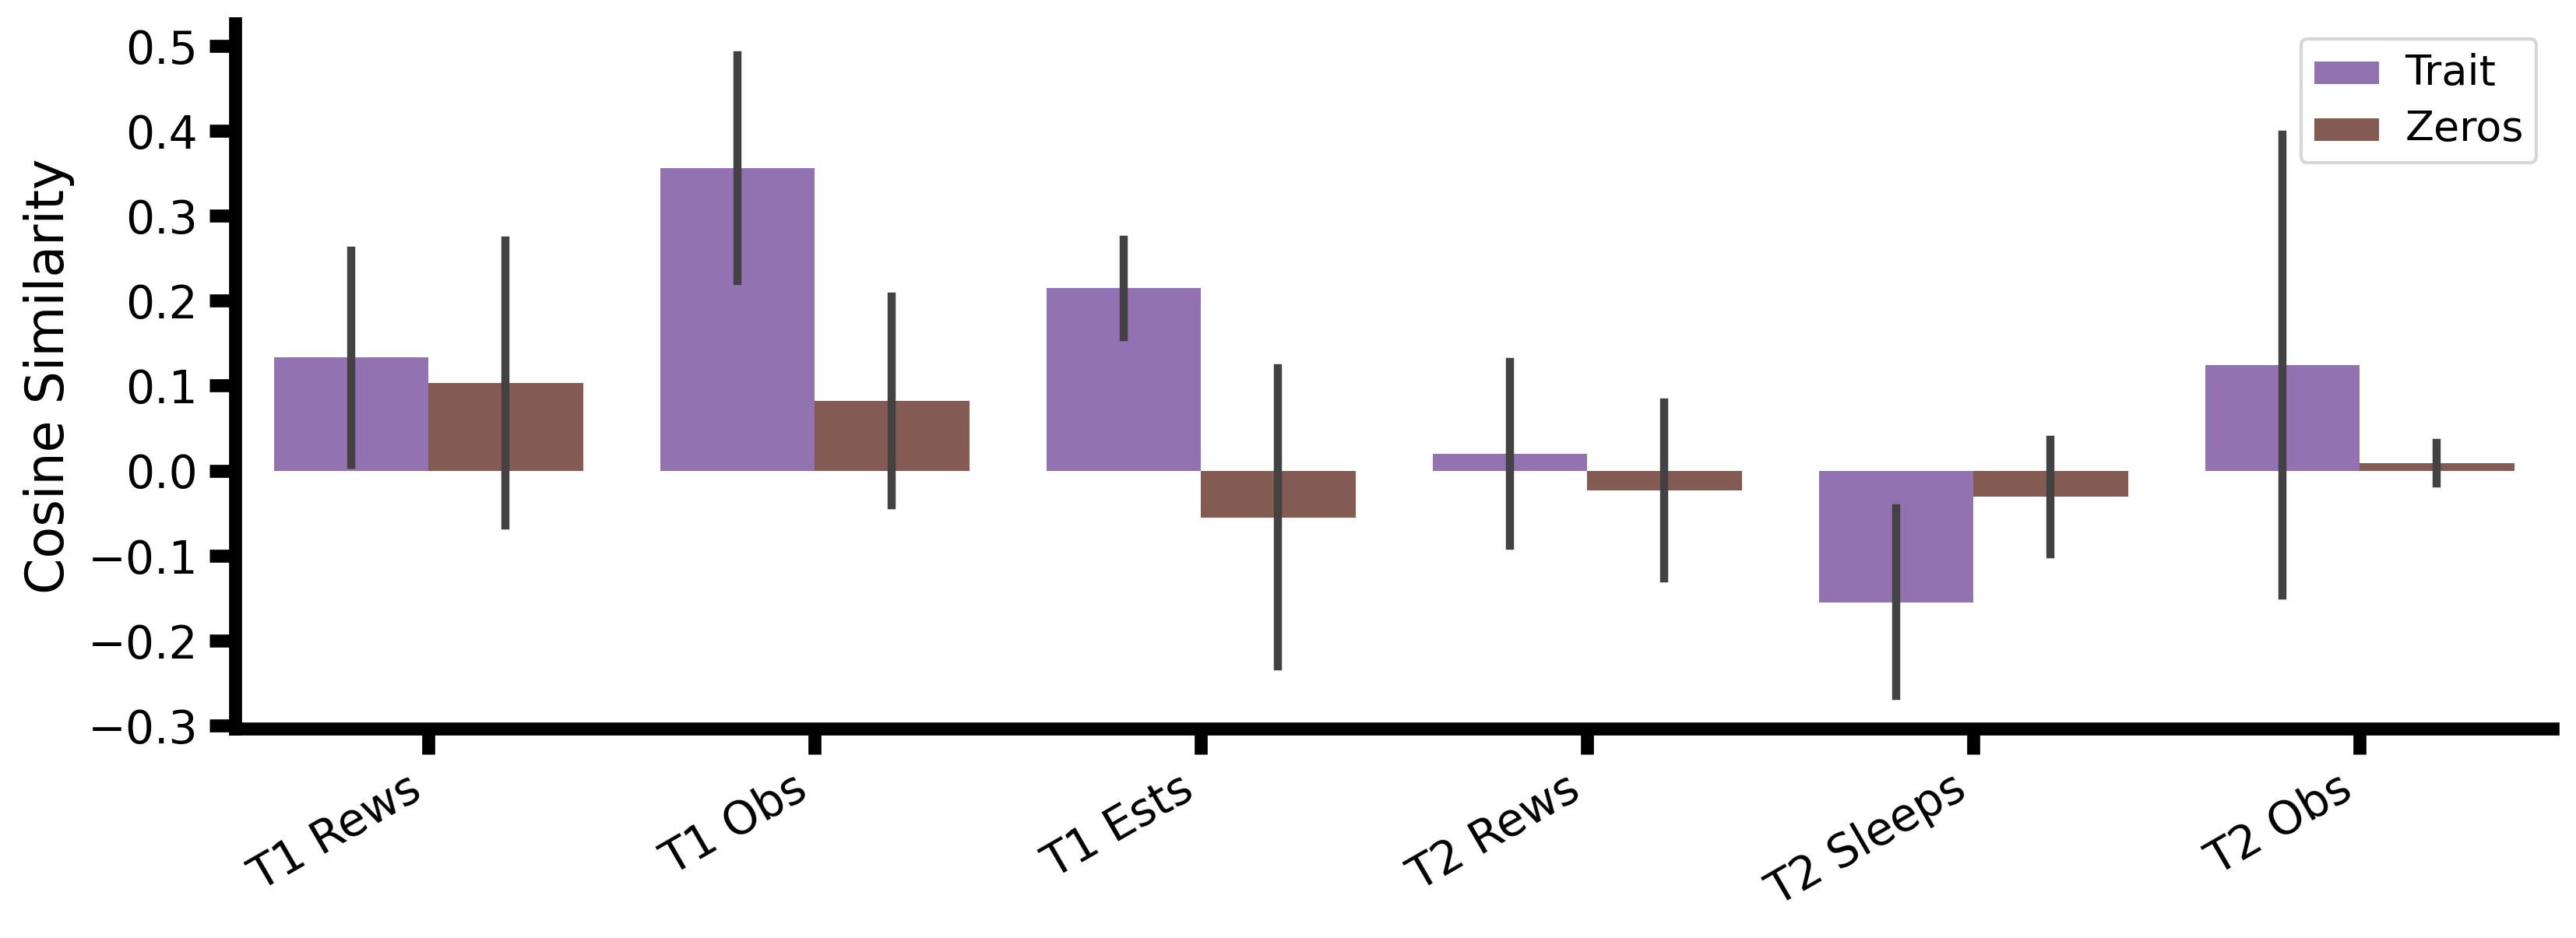

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(12.8, 4), dpi=300)
ax = fig.add_subplot(111)

### Create a Seaborn
s = sns.barplot(x='Name', y='Cosine Similarity', hue='Comparison', data=df_cosim[df_cosim['Comparison'] != "Similarity Difference"], ax=ax, palette=['C4', 'C5'])
s.get_legend().set_title(None)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xlabel(None)

# Adding error bars
# for bar in ax.patches:
#     # Get the height of the bar
#     height = bar.get_height()
#     # Find the index where 'Cosine Similarity' is close to the height of the bar
#     index = np.where(np.isclose(df_cosim['Cosine Similarity'], height))[0][0]
#     lower = df_cosim.loc[df_cosim.index[index], 'Lower']
#     upper = df_cosim.loc[df_cosim.index[index], 'Upper']
#     mean = df_cosim.loc[df_cosim.index[index], 'Cosine Similarity']
#     plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
#                  yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=5)

# Adding error bars
# for bar in ax.patches:
#     # Get the height of the bar
#     height = bar.get_height()
#     # Find the index where 'Cosine Similarity' is close to the height of the bar
#     index = np.where(np.isclose(df_cosim['Cosine Similarity'], height))[0][0]
#     lower = df_cosim.loc[df_cosim.index[index], 'Lower']
#     upper = df_cosim.loc[df_cosim.index[index], 'Upper']
#     mean = df_cosim.loc[df_cosim.index[index], 'Cosine Similarity']
#     plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
#                  yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=5)

format_axis(ax)

In [ ]:
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_perturbed_basic.png'))
fig.savefig(os.path.join(analysis_folder, 'similarity_barplot_perturbed_basic.svg'))

/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kai/anaconda3/envs/meta-torch/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


IndexError: index 0 is out of bounds for axis 0 with size 0

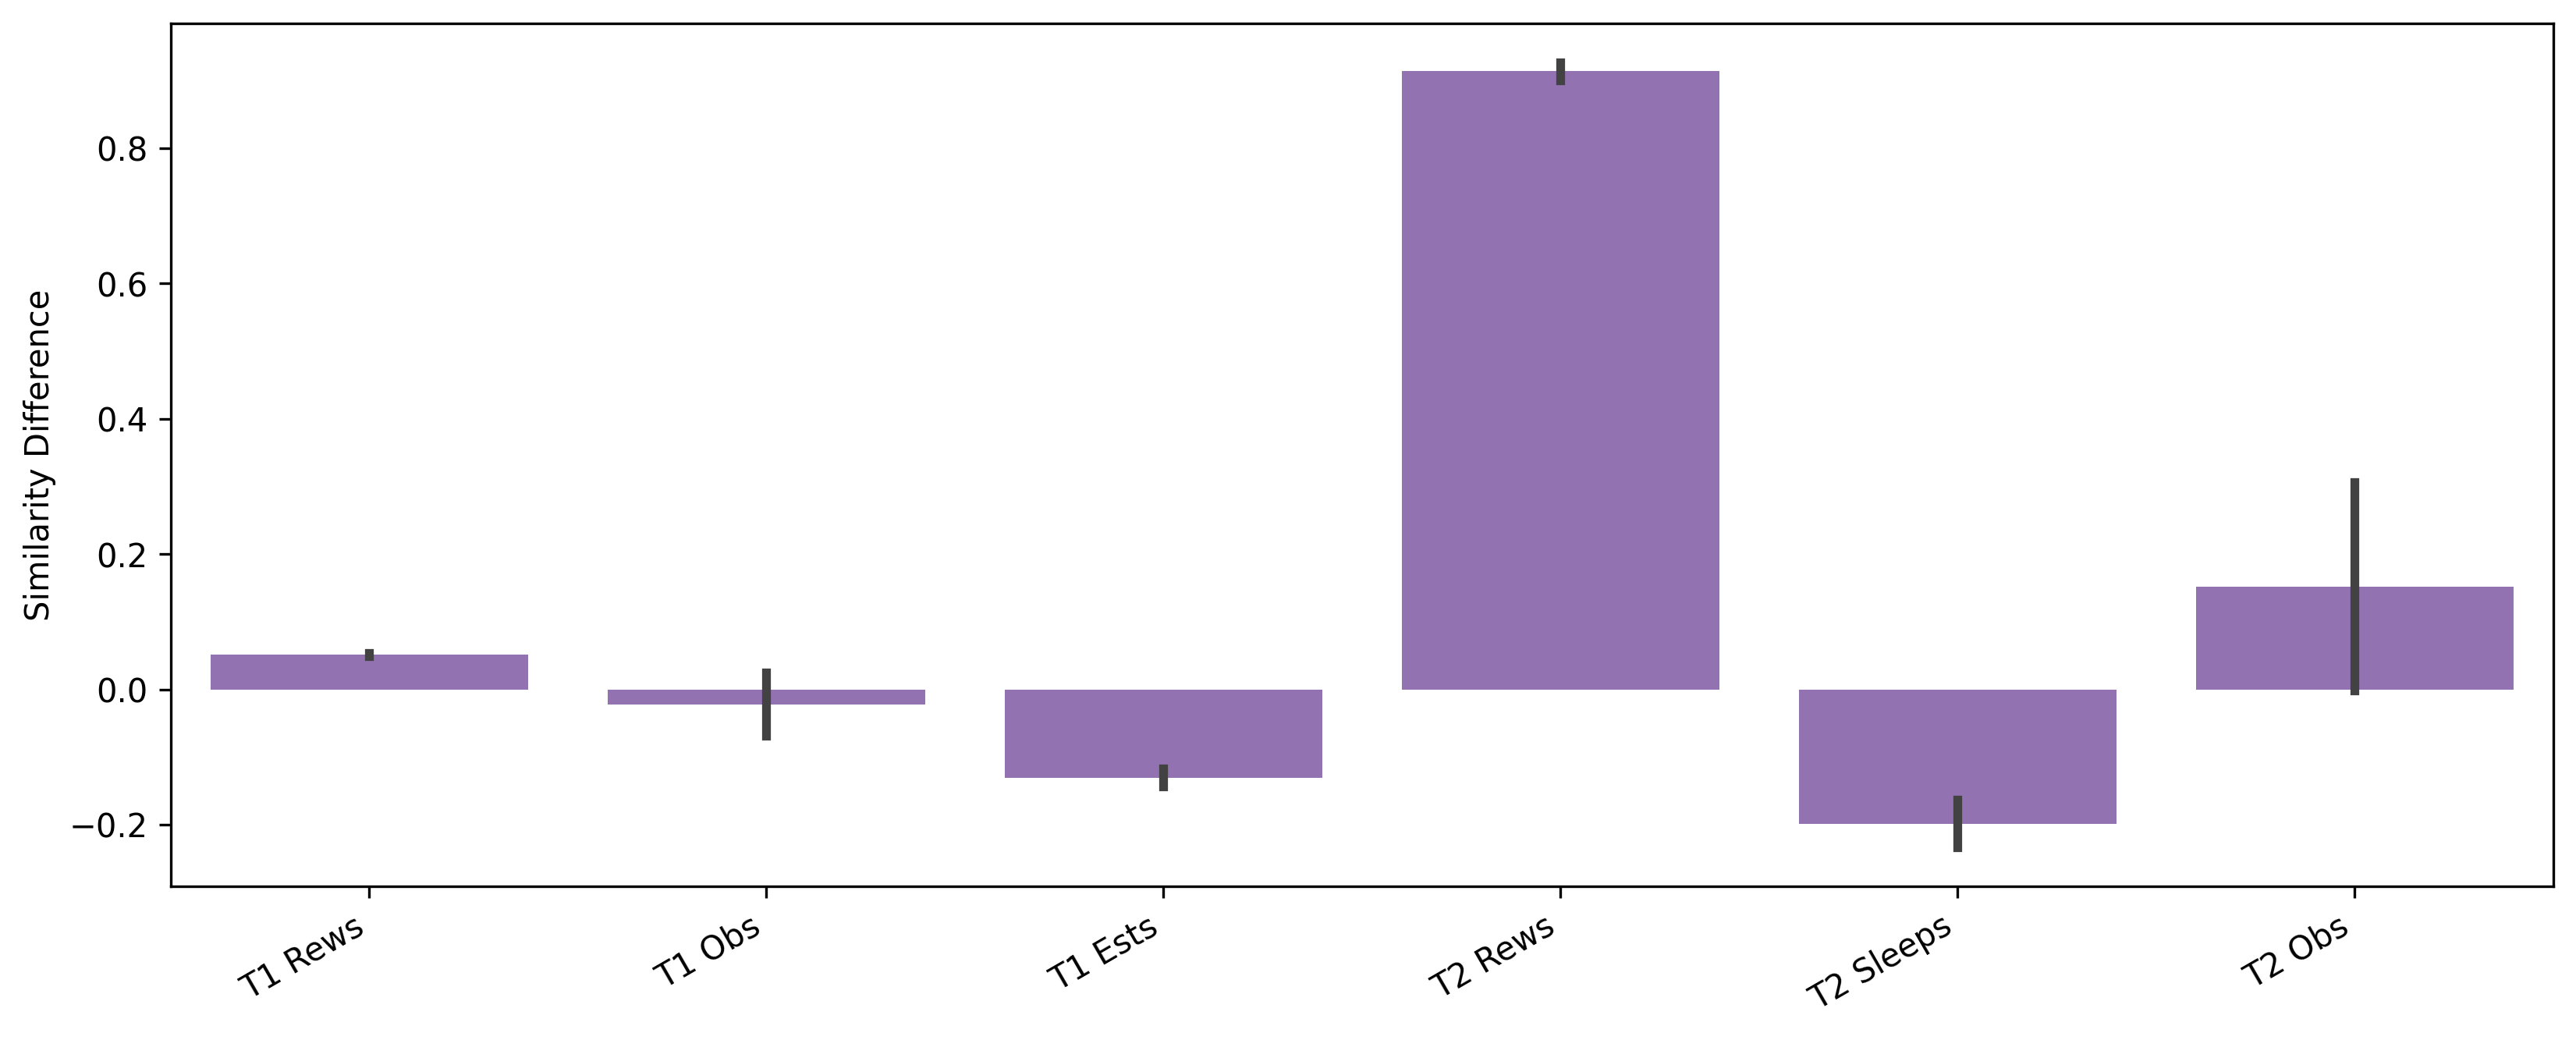

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(13.135, 4.886), dpi=300)
ax = fig.add_subplot(111)

### Create a Seaborn
s = sns.barplot(x='Name', y='Similarity Difference', data=diff_df, ax=ax, palette=['C4'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xlabel(None)

for bar in ax.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Find the index where 'Cosine Similarity' is close to the height of the bar
    index = np.where(np.isclose(diff_df['Similarity Difference'], height))[0][0]
    lower = diff_df.loc[diff_df.index[index], 'Lower']
    upper = diff_df.loc[diff_df.index[index], 'Upper']
    mean = diff_df.loc[diff_df.index[index], 'Similarity Difference']
    print(index, lower, upper, mean)
    plt.errorbar(x=bar.get_x() + bar.get_width() / 2, y=mean, 
                 yerr=[[mean-lower], [upper-mean]], fmt='none', ecolor='black', capsize=8, elinewidth=2, markeredgewidth=2)
    
new_value = 0.6
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - new_value

    # we change the bar width
    patch.set_width(new_value)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)


format_axis(ax, font_size_multiplier=1.4)

In [ ]:
fig.savefig(os.path.join(analysis_folder, 'similarity_difference_barplot.png'))
fig.savefig(os.path.join(analysis_folder, 'similarity_difference_barplot.svg'))